# Analiza złożoności algorytmu sympleks dla różnych reguł wyboru zmiennych wchodzących i wychodzących.


In [2]:
from feasible_set import *

In [3]:
P = random_problem(11)
pretty_print(P)

LP problem (use typeset mode to see details)

In [4]:
pretty_print(basic_solutions(P))

{(0, 2, 6, 8): (3/2, 0, 1/2, 0, 0, 0, 7/6, 0, 11/2),
 (0, 3, 6, 8): (1, 0, 0, 1/7, 0, 0, 23/21, 0, 36/7),
 (2, 4, 6, 8): (0, 0, 1/2, 0, 1/2, 0, 2/3, 0, 4),
 (2, 5, 6, 8): (0, 0, 1/2, 0, 0, 3/2, 7/6, 0, 7),
 (3, 4, 6, 8): (0, 0, 0, 1/7, 1/3, 0, 16/21, 0, 29/7),
 (3, 5, 6, 8): (0, 0, 0, 1/7, 0, 1, 23/21, 0, 43/7)}

In [5]:
show(P.dictionary(1,4,7,9))

LP problem dictionary (use typeset mode to see details)

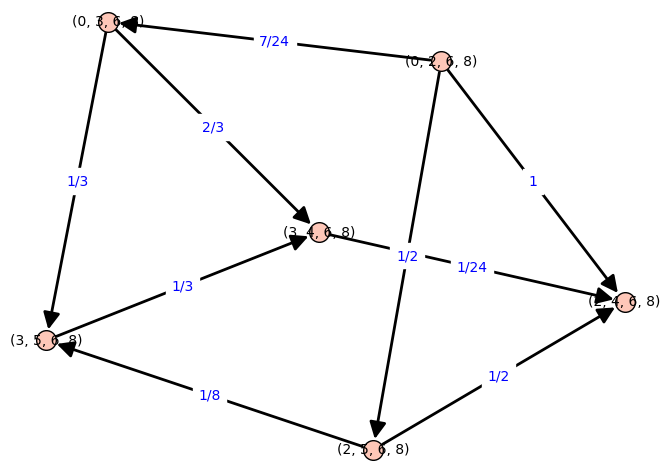

In [6]:
show(solution_graph(P).plot(edge_labels=True))

In [7]:
def feasible_polyhedron(P):
    """
    Returns feasible polyhedron of problem P (converted to equational form).
    """
    
    A = P.A()
    b = P.b()

    A = A.augment(identity_matrix(A.nrows()))
    
    eqns = []
    for row, coeff in zip(A, b):    
        eqns.append([-coeff] + list(row))

    ieqs = []
    for i in range(A.ncols()):
        v = vector(QQ, A.ncols())
        v[i] = 1
        ieqs.append([0] + list(v))
    
    return Polyhedron(ieqs=ieqs, eqns=eqns)

In [8]:
Q = feasible_polyhedron(P)
show(Q)

A 5-dimensional polyhedron in QQ^9 defined as the convex hull of 6 vertices and 12 rays

In [9]:
show(Q.plot())

NotImplementedError: plotting of 9-dimensional polyhedra not implemented

In [10]:
Q.Hrepresentation()

(An equation (1, 3, -12, -36, 6, 0, 0, 0, 1) x - 1 == 0,
 An equation (0, 1, -2, -7, 0, 0, 0, 1, 0) x + 1 == 0,
 An equation (0, 3, -9, -30, 3, 0, 3, 0, 0) x + 1 == 0,
 An equation (1, 0, -3, -7, 3, 1, 0, 0, 0) x + 0 == 0,
 An inequality (1, 0, 0, 0, 0, 0, 0, 0, 0) x + 0 >= 0,
 An inequality (0, -1, 2, 7, 0, 0, 0, 0, 0) x - 1 >= 0,
 An inequality (0, 1, 0, 0, 0, 0, 0, 0, 0) x + 0 >= 0,
 An inequality (-1, 0, 3, 7, -3, 0, 0, 0, 0) x + 0 >= 0,
 An inequality (0, 0, 0, 0, 1, 0, 0, 0, 0) x + 0 >= 0,
 An inequality (0, 0, 0, 1, 0, 0, 0, 0, 0) x + 0 >= 0,
 An inequality (0, 0, 1, 0, 0, 0, 0, 0, 0) x + 0 >= 0)

In [11]:
Q.Vrepresentation()

(A ray in the direction (0, 2, 1, 0, 1, 0, 0, 0, 0),
 A vertex at (1, 0, 0, 1/7, 0, 0, 23/21, 0, 36/7),
 A ray in the direction (3, 2, 1, 0, 0, 0, 1, 0, 3),
 A ray in the direction (3, 0, 1, 0, 0, 0, 3, 2, 9),
 A ray in the direction (7, 7, 0, 1, 0, 0, 3, 0, 8),
 A vertex at (3/2, 0, 1/2, 0, 0, 0, 7/6, 0, 11/2),
 A ray in the direction (7, 0, 0, 1, 0, 0, 10, 7, 29),
 A ray in the direction (0, 0, 0, 1, 0, 7, 10, 7, 36),
 A ray in the direction (0, 0, 0, 3, 7, 0, 23, 21, 66),
 A vertex at (0, 0, 1/2, 0, 0, 3/2, 7/6, 0, 7),
 A vertex at (0, 0, 1/2, 0, 1/2, 0, 2/3, 0, 4),
 A ray in the direction (0, 7, 0, 1, 0, 7, 3, 0, 15),
 A ray in the direction (0, 21, 0, 3, 7, 0, 2, 0, 3),
 A ray in the direction (0, 0, 1, 0, 0, 3, 3, 2, 12),
 A ray in the direction (0, 0, 1, 0, 1, 0, 2, 2, 6),
 A ray in the direction (0, 2, 1, 0, 0, 3, 1, 0, 6),
 A vertex at (0, 0, 0, 1/7, 0, 1, 23/21, 0, 43/7),
 A vertex at (0, 0, 0, 1/7, 1/3, 0, 16/21, 0, 29/7))

In [12]:
Qc = Polyhedron(vertices=[(1, 0, 0, 1/7, 0, 0, 23/21, 0, 36/7), (3/2, 0, 1/2, 0, 0, 0, 7/6, 0, 11/2), (0, 0, 1/2, 0, 0, 3/2, 7/6, 0, 7),
                        (0, 0, 1/2, 0, 1/2, 0, 2/3, 0, 4), (0, 0, 0, 1/7, 0, 1, 23/21, 0, 43/7), (0, 0, 0, 1/7, 1/3, 0, 16/21, 0, 29/7)])
show(Qc.plot())

Graphics3d Object

In [14]:
show(Qc.affine_hull_projection(as_affine_map=True))

(Vector space morphism represented by the matrix:
 [1 0 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 Domain: Vector space of dimension 9 over Rational Field
 Codomain: Vector space of dimension 3 over Rational Field, (0, 0, 0))

In [15]:
P = diamond_polyhedron(random_seed=2, cols=3, rows=8)
show(P)

LP problem (use typeset mode to see details)

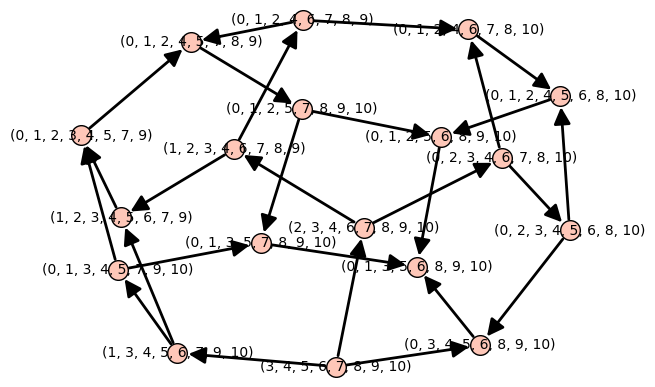

In [16]:
set_random_seed(3)
show(solution_graph(P).plot(edge_labels=False))

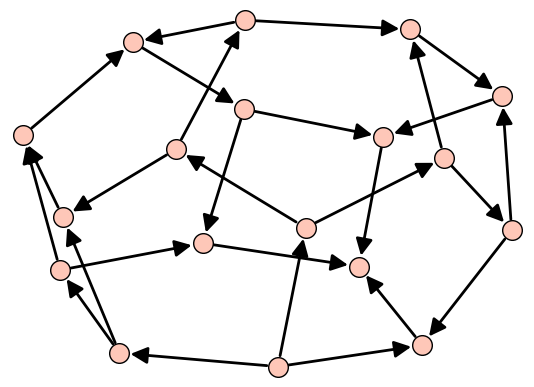

In [17]:
set_random_seed(3)
show(solution_graph(P).plot(edge_labels=False, vertex_labels=False))

In [18]:
Q = feasible_polyhedron(P)
show(Q)

A 3-dimensional polyhedron in QQ^11 defined as the convex hull of 18 vertices

In [19]:
show(Q.plot())

Graphics3d Object

In [20]:
def labelled_solution_graph(P: InteractiveLPProblemStandardForm):
    c = vector(QQ, P.c().list() + ([0] * P.A().nrows()))

    vname = []
    for length in range(1, 3):
        for combo in product(ascii_lowercase, repeat=length):
            vname.append(''.join(combo))
    
    names = {}
    
    S = basic_solutions(P)
    E = list()
    for n1, B1 in enumerate(S):
        names[B1] = vname[n1]
        
        for n2, B2 in enumerate(S):
            S1 = set(B1)
            S2 = set(B2)
            if len(S1.difference(S2)) == 1 and len(S2.difference(S1)) == 1:
                if c * S[B1] <= c * S[B2]:
                    E.append((vname[n1], vname[n2], c * S[B2] - c * S[B1]))
   
    g = DiGraph(E)
    return g, names

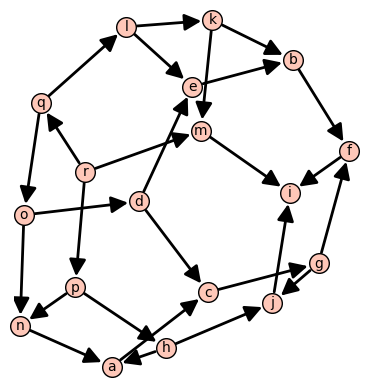

In [29]:
G, name = labelled_solution_graph(P)
set_random_seed(1)
show(G)

In [22]:
show(name)

{(0, 1, 2, 3, 4, 5, 7, 9): 'a',
 (0, 1, 2, 4, 5, 6, 8, 10): 'b',
 (0, 1, 2, 4, 5, 7, 8, 9): 'c',
 (0, 1, 2, 4, 6, 7, 8, 9): 'd',
 (0, 1, 2, 4, 6, 7, 8, 10): 'e',
 (0, 1, 2, 5, 6, 8, 9, 10): 'f',
 (0, 1, 2, 5, 7, 8, 9, 10): 'g',
 (0, 1, 3, 4, 5, 7, 9, 10): 'h',
 (0, 1, 3, 5, 6, 8, 9, 10): 'i',
 (0, 1, 3, 5, 7, 8, 9, 10): 'j',
 (0, 2, 3, 4, 5, 6, 8, 10): 'k',
 (0, 2, 3, 4, 6, 7, 8, 10): 'l',
 (0, 3, 4, 5, 6, 8, 9, 10): 'm',
 (1, 2, 3, 4, 5, 6, 7, 9): 'n',
 (1, 2, 3, 4, 6, 7, 8, 9): 'o',
 (1, 3, 4, 5, 6, 7, 9, 10): 'p',
 (2, 3, 4, 6, 7, 8, 9, 10): 'q',
 (3, 4, 5, 6, 7, 8, 9, 10): 'r'}

In [23]:
# Wierzchołek d
show(P.dictionary(1,2,3,5,7,8,9,10))

LP problem dictionary (use typeset mode to see details)

In [30]:
P = diamond_polyhedron(random_seed=3, cols=3, rows=18)
show(P)

LP problem (use typeset mode to see details)

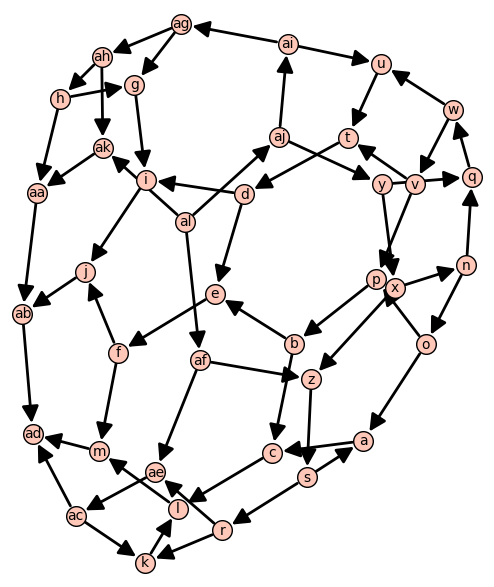

In [31]:
G, name = labelled_solution_graph(P)
set_random_seed(1)
G.plot(figsize=(6, 6))

In [32]:
feasible_polyhedron(P).plot()

Graphics3d Object

In [33]:
F = basic_solutions(P)
Q = feasible_polyhedron(P)
R = Q.affine_hull_projection(as_affine_map=True)
c = vector(QQ, P.c().list() + [0] * P.A().nrows())
G, name = labelled_solution_graph(P)
S = Q.affine_hull_projection().projection()

from sage.plot.plot3d.shapes import Text
show(sum([point(R[0](v) + R[1], size=5, opacity=0.5) for v in F.values()]) + 
     S.render_wireframe_3d() + 
     arrow3d(vector(QQ, 3), R[0](c) + R[1], width=0.2) +
     sum([Text(str(name[w]), color='black').translate(R[0](v) + R[1] + vector([0,1/40,0])) for w, v in F.items()]))
print(name)

Graphics3d Object

{(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 20): 'a', (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 18, 19, 20): 'b', (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 17, 18, 19, 20): 'c', (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 20): 'd', (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20): 'e', (0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20): 'f', (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20): 'g', (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20): 'h', (0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20): 'i', (0, 1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20): 'j', (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19): 'k', (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20): 'l', (0, 1, 2, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20): 'm', (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20): 'n', (0, 1, 2, 3, 4, 6, 7

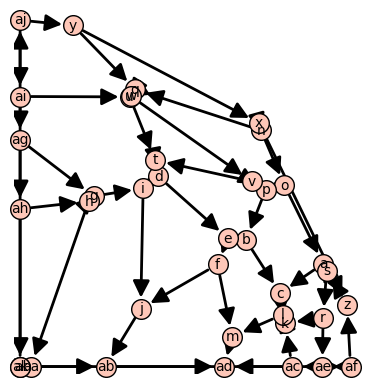

In [35]:
G, name = labelled_solution_graph(P)
pos = { name[base]: R[0](F[base]) + R[1] for base in F}
show(G.plot(pos=pos))

In [36]:
P.optimal_solution()

(4079984/6427713, 0, 5090389/6427713)

In [37]:
r_name = {b: tuple((x+1 for x in n)) for n, b in name.items()}
pretty_print(r_name)

{'a': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21),
 'b': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 18, 19, 20, 21),
 'c': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 18, 19, 20, 21),
 'd': (1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21),
 'e': (1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21),
 'f': (1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'g': (1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21),
 'h': (1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21),
 'i': (1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21),
 'j': (1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'k': (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20),
 'l': (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21),
 'm': (1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'n': (1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21),
 'o': (1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21),
 'p': (1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21),
 'q': (1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21),
 'r': (1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20),
 's': (1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21),
 't': (1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21),
 'u': (1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21),
 'v': (1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21),
 'w': (1, 2, 3, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'x': (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21),
 'y': (1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21),
 'z': (1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21),
 'aa': (1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21),
 'ab': (1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'ac': (1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20),
 'ad': (1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'ae': (1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20),
 'af': (1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'ag': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21),
 'ah': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21),
 'ai': (2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21),
 'aj': (2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'ak': (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21),
 'al': (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)}

In [38]:
print(r_name['ad'])
show(P.dictionary(*r_name['ad']))

(1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)


LP problem dictionary (use typeset mode to see details)

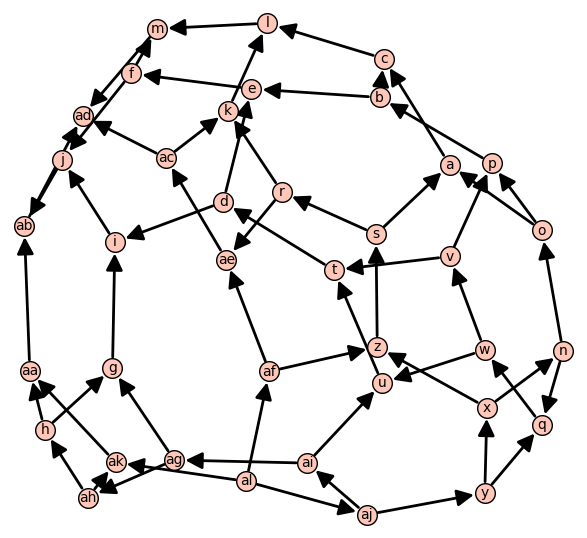

In [39]:
set_random_seed(3)
G.plot(figsize=(6,6))

In [40]:
r_name

{'a': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21),
 'b': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 18, 19, 20, 21),
 'c': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 18, 19, 20, 21),
 'd': (1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21),
 'e': (1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21),
 'f': (1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'g': (1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21),
 'h': (1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21),
 'i': (1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21),
 'j': (1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'k': (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20),
 'l': (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21),
 'm': (1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21),
 'n': (1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20

In [41]:
def bland_rule(P, G, r_name, v, verb=True):
    """
    P - problem
    G - labelled graph
    r_name - reverse mapping vertex label -> base (enumerated from 1 to n)
    v - vertex label
    
    Returns vertex w such that Bland's rule will pivot from v to w.
    
    Returns None if there is no pivot (either v is optimal or problem is unbounded).
    """
        
    if verb:
        print(f'Wierzchołek {v}, zmienne bazowe {r_name[v]}')
        print(f'Sąsiedzi (krawędzie wychodzące): {G.neighbors_out(v)}')
    
    min_out = min_in = P.A().ncols() + P.A().nrows() + 1
    min_w = None
    
    for w in G.neighbors_out(v):
        (x_in,) = set(r_name[w]) - set(r_name[v])
        (x_out,) = set(r_name[v]) - set(r_name[w])

        if verb:
            print(f'Dla sąsiada {w} zmienna wchodząca to x{x_in} i wychodząca to x{x_out}.')
        
        if x_in < min_in or (x_in == min_in and x_out < min_out):
            min_in = x_in
            min_out = x_out
            min_w = w           
    
    if verb:
        print(f'Wybieram zmienną wchodzącą x{min_in}, wychodzącą x{min_out} i przejście do wierzchołka {min_w}.')
    
    return min_w

bland_rule(P, G, r_name, 'af')

Wierzchołek af, zmienne bazowe (1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)
Sąsiedzi (krawędzie wychodzące): ['z', 'ae']
Dla sąsiada z zmienna wchodząca to x2 i wychodząca to x19.
Dla sąsiada ae zmienna wchodząca to x3 i wychodząca to x21.
Wybieram zmienną wchodzącą x2, wychodzącą x19 i przejście do wierzchołka z.


'z'

In [42]:
bland_edges = []

for v in G:
    w = bland_rule(P, G, r_name, v, verb=False)
    if w is not None:
        bland_edges.append((v, w))

In [43]:
bland_edges

[('a', 'c'),
 ('c', 'l'),
 ('b', 'e'),
 ('e', 'f'),
 ('l', 'm'),
 ('d', 'i'),
 ('i', 'j'),
 ('f', 'm'),
 ('j', 'ab'),
 ('m', 'ad'),
 ('g', 'i'),
 ('h', 'aa'),
 ('aa', 'ab'),
 ('ab', 'ad'),
 ('k', 'l'),
 ('n', 'o'),
 ('o', 'a'),
 ('q', 'w'),
 ('p', 'b'),
 ('w', 'u'),
 ('r', 'k'),
 ('ae', 'ac'),
 ('s', 'a'),
 ('t', 'd'),
 ('u', 't'),
 ('v', 'p'),
 ('x', 'n'),
 ('z', 's'),
 ('y', 'q'),
 ('ac', 'k'),
 ('af', 'z'),
 ('ag', 'g'),
 ('ah', 'h'),
 ('ak', 'aa'),
 ('ai', 'u'),
 ('aj', 'y'),
 ('al', 'af')]

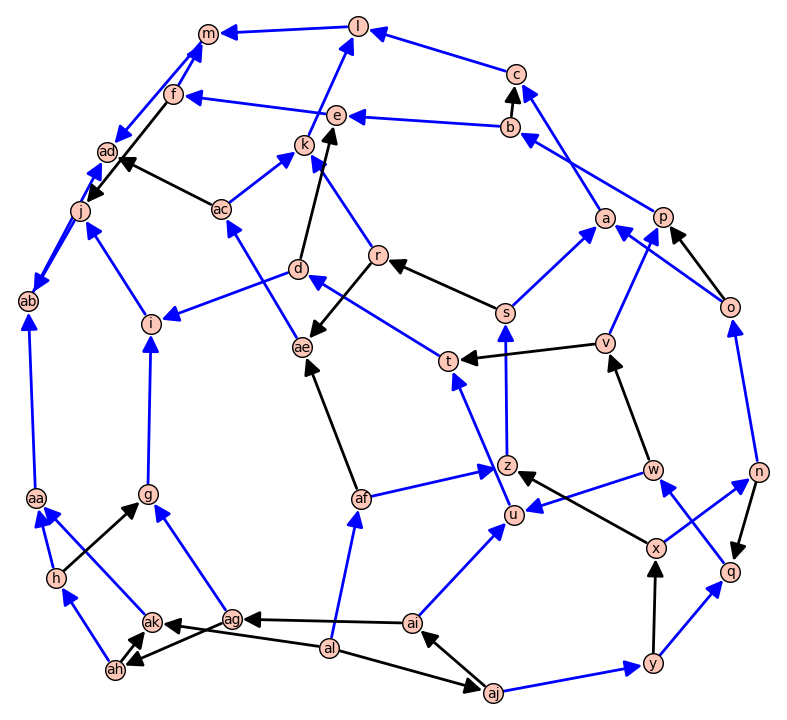

In [44]:
set_random_seed(3)
G.plot(edge_colors = {'blue': bland_edges}, figsize=(8,8))

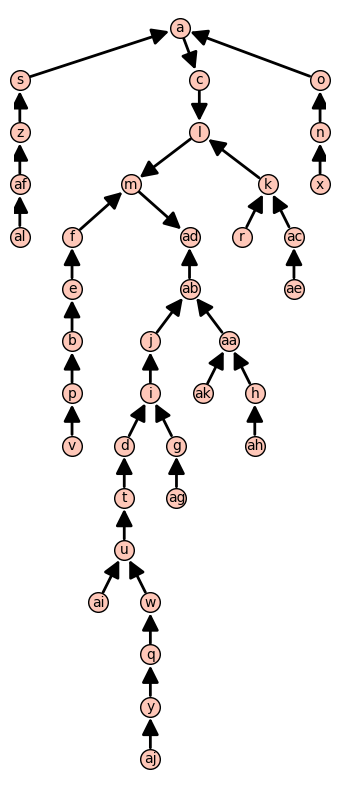

In [45]:
H = G.subgraph(G.vertices(), bland_edges)
set_random_seed(1)
H.plot(figsize=(8,8), layout='tree')

In [46]:
show(P.dictionary(*r_name['ad']))

LP problem dictionary (use typeset mode to see details)

In [47]:
s = 0
m = 0
l = 0

for path in H.all_paths_iterator(ending_vertices=['ad']):
    print(path, len(path))
    s += len(path)
    if len(path) > m:
        m = len(path)
    l += 1

print(f'Łączna długość {s}')
print(f'Maksymalna długość {m}')
print(f'Średnia długość {s/l} = {float(s/l)}')


['ab', 'ad'] 2
['m', 'ad'] 2
['aa', 'ab', 'ad'] 3
['j', 'ab', 'ad'] 3
['f', 'm', 'ad'] 3
['l', 'm', 'ad'] 3
['ak', 'aa', 'ab', 'ad'] 4
['k', 'l', 'm', 'ad'] 4
['h', 'aa', 'ab', 'ad'] 4
['i', 'j', 'ab', 'ad'] 4
['e', 'f', 'm', 'ad'] 4
['c', 'l', 'm', 'ad'] 4
['ah', 'h', 'aa', 'ab', 'ad'] 5
['ac', 'k', 'l', 'm', 'ad'] 5
['r', 'k', 'l', 'm', 'ad'] 5
['g', 'i', 'j', 'ab', 'ad'] 5
['d', 'i', 'j', 'ab', 'ad'] 5
['b', 'e', 'f', 'm', 'ad'] 5
['a', 'c', 'l', 'm', 'ad'] 5
['ag', 'g', 'i', 'j', 'ab', 'ad'] 6
['t', 'd', 'i', 'j', 'ab', 'ad'] 6
['s', 'a', 'c', 'l', 'm', 'ad'] 6
['ae', 'ac', 'k', 'l', 'm', 'ad'] 6
['p', 'b', 'e', 'f', 'm', 'ad'] 6
['o', 'a', 'c', 'l', 'm', 'ad'] 6
['z', 's', 'a', 'c', 'l', 'm', 'ad'] 7
['v', 'p', 'b', 'e', 'f', 'm', 'ad'] 7
['u', 't', 'd', 'i', 'j', 'ab', 'ad'] 7
['n', 'o', 'a', 'c', 'l', 'm', 'ad'] 7
['ai', 'u', 't', 'd', 'i', 'j', 'ab', 'ad'] 8
['af', 'z', 's', 'a', 'c', 'l', 'm', 'ad'] 8
['x', 'n', 'o', 'a', 'c', 'l', 'm', 'ad'] 8
['w', 'u', 't', 'd', 'i', 'j', '